<a href="https://colab.research.google.com/github/Sunay-2103/SunayMukherjee_23FE10CSE00636/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing Linear Regression on Housing Dataset due to the presence of Classification in given dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_housing = pd.read_csv('/content/USA_Housing.csv')
display(df_housing.head())

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [35]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [36]:
X_housing = df_housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                        'Avg. Area Number of Bedrooms', 'Area Population']]
Y_housing = df_housing['Price']

print("X_housing (features) head:")
display(X_housing.head())

print("\nY_housing (target) head:")
display(Y_housing.head())

X_housing (features) head:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472



Y_housing (target) head:


,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [37]:
from sklearn.model_selection import train_test_split
X_train_housing, X_test_housing, Y_train_housing, Y_test_housing = train_test_split(X_housing, Y_housing, test_size=0.3, random_state=123)

print("Training feature set size:",X_train_housing.shape)
print("Test feature set size:",X_test_housing.shape)
print("Training variable set size:",Y_train_housing.shape)
print("Test variable set size:",Y_test_housing.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [47]:
LM = LinearRegression()

In [48]:
LM.fit(X_train_housing ,Y_train_housing)

LinearRegression()

In [49]:
print("The intercept term of the linear model:", LM.intercept_)

The intercept term of the linear model: -2631028.9017454907


In [50]:
print("The coefficients of the linear model:", LM.coef_)

The coefficients of the linear model: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [51]:
cdf = pd.DataFrame(data=LM.coef_, index=X_train_housing.columns, columns=["Coefficients"])
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


In [67]:
n=X_train_housing.shape[0]
k=X_train_housing.shape[1]
dfN = n-k
train_pred=LM.predict(X_train_housing)
train_error = np.square(train_pred - Y_train_housing)
sum_error=np.sum(train_error)

# Re-initialize cdf for the housing data to avoid conflicts
cdf = pd.DataFrame(data=LM.coef_, index=X_train_housing.columns, columns=["Coefficients"])

se=[]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train_housing[
        list(X_train_housing.columns)[i]]-X_train_housing[list(X_train_housing.columns)[i]].mean()))
    se.append(np.sqrt(r))
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Area Income,21.597602,0.160361,134.681505
Avg. Area House Age,165201.104954,1722.412068,95.912649
Avg. Area Number of Rooms,119061.463868,1696.546476,70.178722
Avg. Area Number of Bedrooms,3212.585606,1376.451759,2.333962
Area Population,15.228121,0.169882,89.639472


In [68]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


Text(0.5, 1.0, 'Area Population vs. Price')

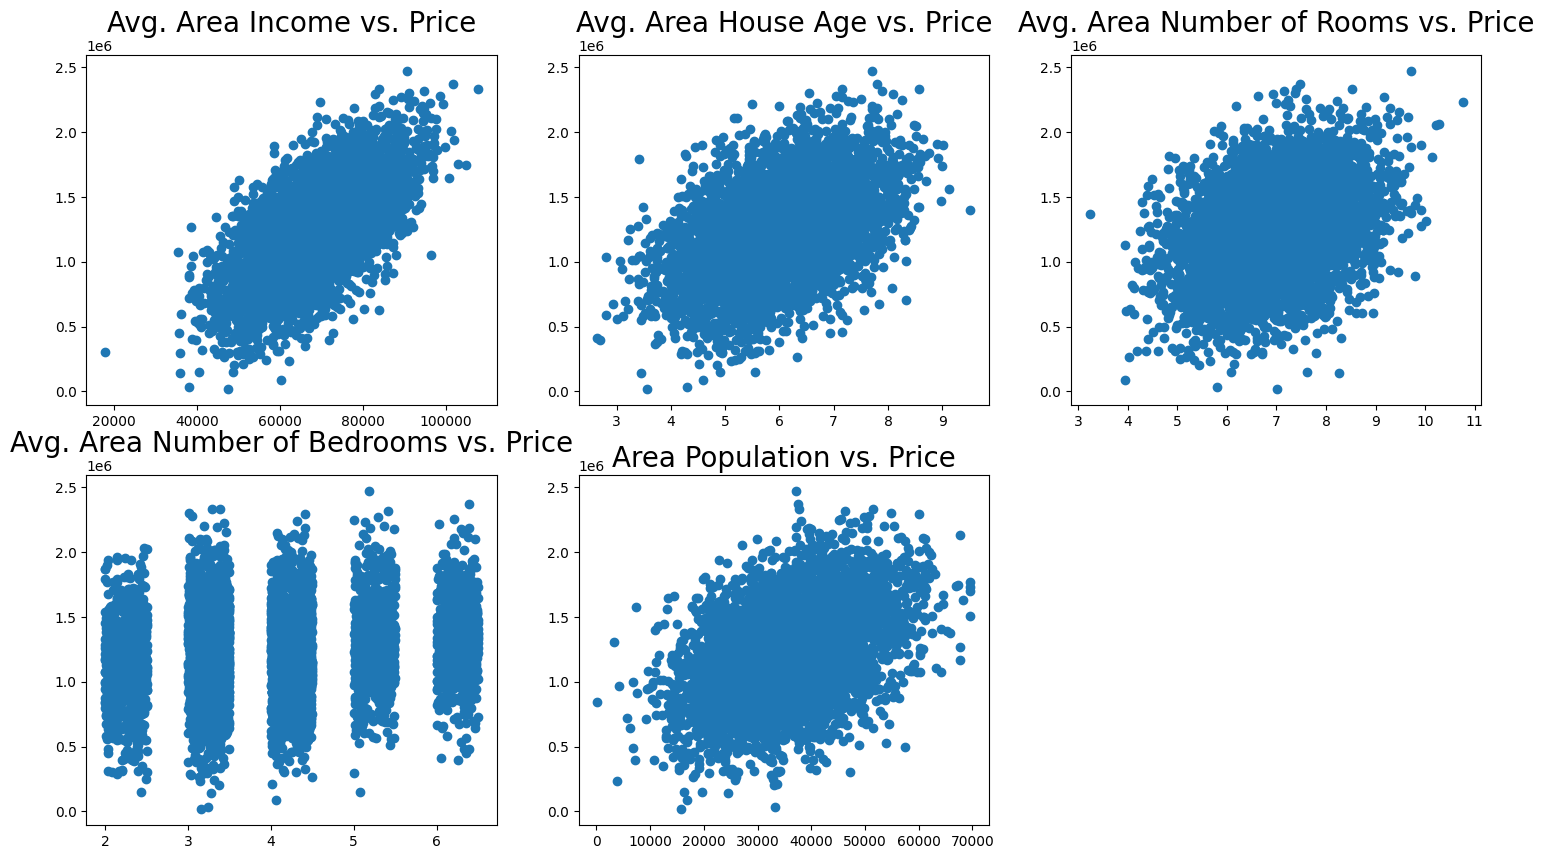

In [70]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df_housing[l[0]],df_housing['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df_housing[l[1]],df_housing['Price'])
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df_housing[l[2]],df_housing['Price'])
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df_housing[l[3]],df_housing['Price'])
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df_housing[l[4]],df_housing['Price'])
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})

In [74]:
print("R-squared value of this fit:",round(metrics.r2_score(Y_train_housing,train_pred),3))

R-squared value of this fit: 0.917


In [76]:
predictions_housing = LM.predict(X_test_housing)
print ("Type of the predicted object:", type(predictions_housing))
print ("Size of the predicted object:", predictions_housing.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


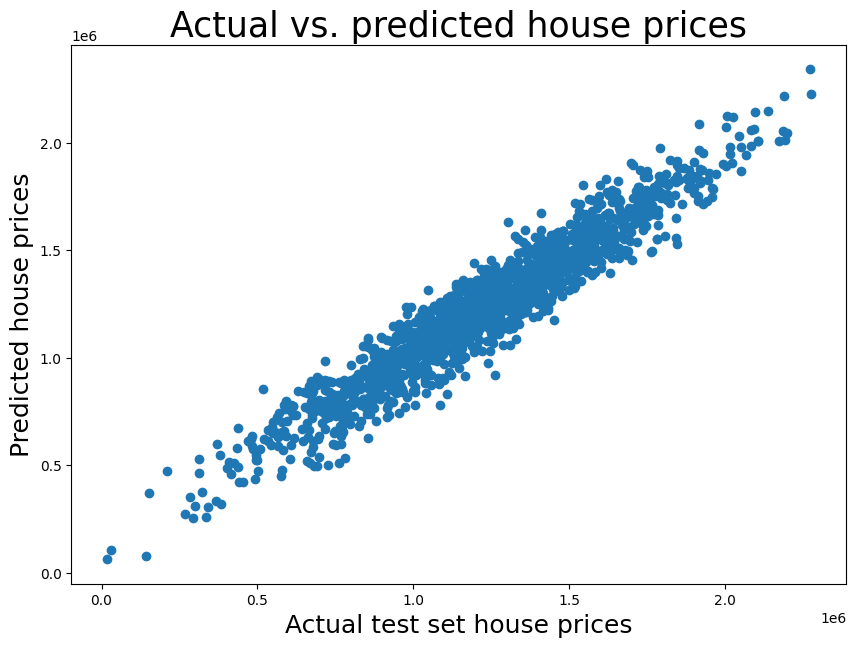

In [77]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=Y_test_housing,y=predictions_housing)

<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

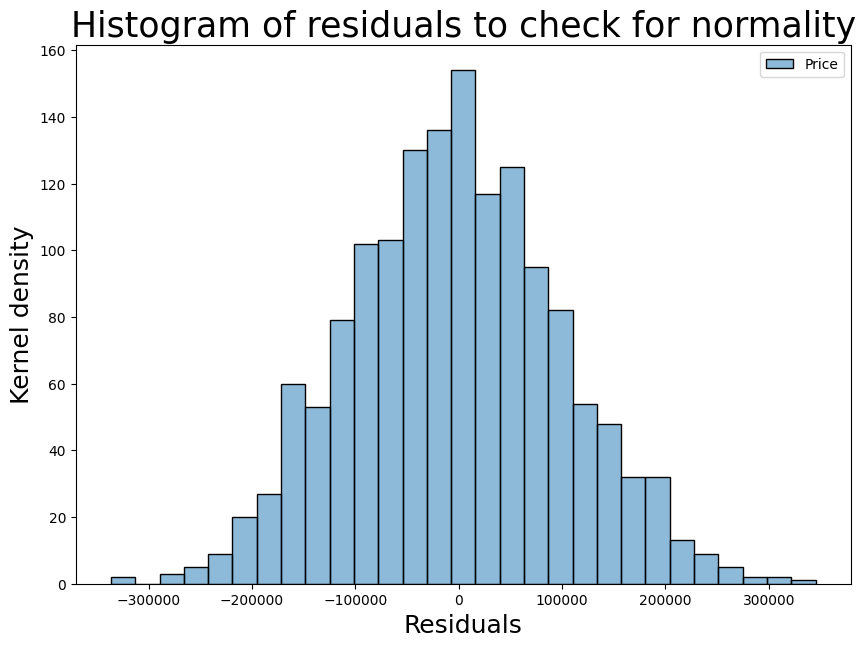

In [78]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot([Y_test_housing-predictions_housing])

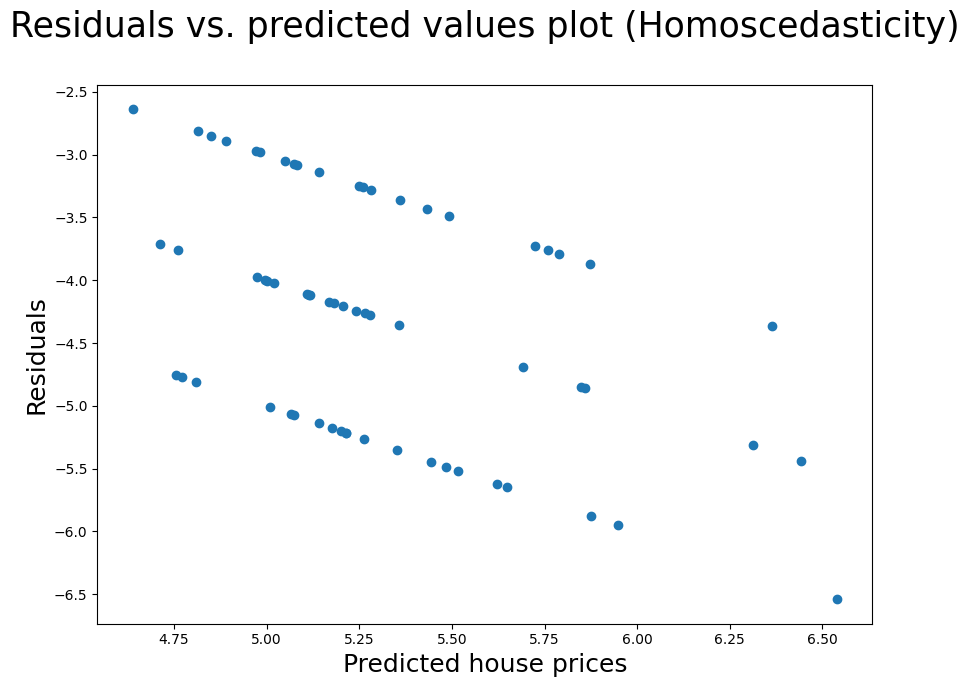

In [79]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

In [80]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 4.315011295846265
Mean square error (MSE): 19.502212305213554
Root mean square error (RMSE): 4.416130920298169


In [81]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: -28.253


Implementation of LM model on Seeds dataset with classified data to understand why its not useful

In [3]:
df = pd.read_csv('/content/Seed_Data.csv', engine = 'python')

In [52]:
X = df[columns[0:len_feature-2]] # All columns except 'target'
Y = df['Length of Kernel Groove'] # The 'target' column

In [53]:
print("Feature set size:",X.shape)
print("Variable set size:",Y.shape)

Feature set size: (210, 6)
Variable set size: (210,)


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [28]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",Y_train.shape)
print("Test variable set size:",Y_test.shape)

Training feature set size: (147, 7)
Test feature set size: (63, 7)
Training variable set size: (147,)
Test variable set size: (63,)


In [6]:
df=df.rename(columns = {'A' : 'Area'})
df=df.rename(columns = {'P' : 'Perimeter'})
df=df.rename(columns = {'C' : 'Compactness'})
df=df.rename(columns = {'LK' : 'Length of Kernel'})
df=df.rename(columns = {'WK' : 'Width of Kernel'})
df=df.rename(columns = {'A_Coef' : 'Asymmetry of Kernel'})
df=df.rename(columns = {'LKG' : 'Length of Kernel Groove'})


In [7]:
columns = list(df.columns)
len_feature = len(columns)
columns

['Area',
 'Perimeter',
 'Compactness',
 'Length of Kernel',
 'Width of Kernel',
 'Asymmetry of Kernel',
 'Length of Kernel Groove',
 'target']

In [56]:
print("Feature set size:",X.shape)
print("Variable set size:",Y.shape)

Feature set size: (210, 6)
Variable set size: (210,)


In [58]:
X.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry of Kernel
0,15.26,14.84,0.8710,5.763,3.312,2.221
1,14.88,14.57,0.8811,5.554,3.333,1.018
2,14.29,14.09,0.9050,5.291,3.337,2.699
3,13.84,13.94,0.8955,5.324,3.379,2.259
4,16.14,14.99,0.9034,5.658,3.562,1.355


In [57]:
Y.head()

,Length of Kernel Groove
0,5.220
1,4.956
2,4.825
3,4.805
4,5.175


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(X_train, Y_train)

LinearRegression()

In [62]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: 12.54081746650317


In [63]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [ 0.48207598 -0.68088567 -6.76429862  0.65258038 -0.70286515  0.03560585]


In [64]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
Area,0.482076
Perimeter,-0.680886
Compactness,-6.764299
Length of Kernel,0.652580
Width of Kernel,-0.702865
Asymmetry of Kernel,0.035606
